Marta Kałużna (290283)
# Numerical Optimization

## Problem set 5

### **Problem 5.1** (5 pts)
Complete the implementation of Newton's method (see [Boyd, *Convex Optimization*, $\S 9.5.2$])
<img src="Boyd-Newton_method.png">

In [117]:
import numpy as np
import time
import matplotlib.pyplot as plt

###############################################################################
def newton(func, initial_x, eps=1e-5, maximum_iterations=65536, linesearch=bisection):
    """ 
    Newton's Method
    func:               the function to optimize It is called as "value, gradient, hessian = func( x, 2 )
    initial_x:          the starting point
    eps:                the maximum allowed error in the resulting stepsize t
    maximum_iterations: the maximum allowed number of iterations
    linesearch:         the linesearch routine
    *linesearch_args:   the extra arguments of linesearch routine
    """
    
    if eps <= 0:
        raise ValueError("Epsilon must be positive")
        
    x = initial_x
    
    # initialization
    values = []
    runtimes = []
    xs = []
    start_time = time.time()
    iterations = 1
    
    # Newton's method updates
    while True:
        
        print(f"Iteration: {iterations}, point: {x}")
        
        if iterations >= maximum_iterations:
            print("Too many iterations")
            break
    
        value, gradient, hessian = func(x, order=2)
        
        # updating the logs
        values.append(x)
        runtimes.append(time.time() - start_time)
        xs.append(x.copy())

        ### TODO: Compute the Newton update direction
        direction = - np.linalg.inv(hessian)@gradient

        ### TODO: Compute the Newton decrement
        newton_decrement = gradient.T @ np.linalg.inv(hessian) @ gradient


        if newton_decrement/2 <= eps:   ### TODO: TERMINATION CRITERION
            break
        
        t = linesearch(func, x, direction)

        ### TODO: update x
        x = x + t*direction
        
        iterations += 1
        
    return (x, values, runtimes, xs)

Test your implementation and compare the results for 
* function `my_func` from problem 3.3. Remark that you should implement the case `order=2` first.
* functions `boyd_example_func` and `quadratic` from problem 3.6.

You should use both `exact_line_search` and `backtracking` (from problems 3.3 and 3.4 for `linesearch` parameter).

<img width="80%" src="Boyd-line_search.png">

In [145]:
# Rosenbrock function
def my_func(x, order = 0):
    value = (1 - x[0])**2 + 100*(x[1]- x[0]**2)**2
    if order == 0:
        return value
    elif order == 1:
        gradient = np.array([2*(200*x[0]**3 - 200*x[0]*x[1] + x[0]-1),200*(x[1]-x[0]**2)])
        return (value, gradient)
    else:
        gradient = np.array([2*(200*x[0]**3 - 200*x[0]*x[1] + x[0]-1),200*(x[1]-x[0]**2)])
        hessian = np.array([[1200*x[0]**2-400*x[1] + 2,-400*x[0]], [-400*x[0],200]])
        return (value, gradient, hessian)

    
def boyd_example_func(x, order=0):
  a = np.array([1, 3])
  b = np.array([1, -3])
  c = np.array([-1, 0])
  x = np.array(x)

  value = np.exp(a@x-0.1) + np.exp(b@x-0.1) + np.exp(c@x-0.1)
  if order==0:
      return value
  elif order==1:
      gradient = a.T*np.exp(a@x - 0.1) + b.T*np.exp(b@x - 0.1) + c.T*np.exp(c@x - 0.1)
      return (value, gradient)
  elif order==2:
      gradient = a.T*np.exp(a@x - 0.1) + b.T*np.exp(b@x - 0.1) + c.T*np.exp(c@x - 0.1)
      hessian = np.array([[np.exp(a@x) + np.exp(b@x) + np.exp(c@x), 3*(np.exp(6*x[1]) - 1)*np.exp(x[0] - 3*x[1])],
          [3*(np.exp(6*x[1]) - 1)*np.exp(x[0] - 3*x[1]), 9*(np.exp(6*x[1]) + 1)*np.exp(x[0] - 3*x[1])]])
      return (value, gradient, hessian)
  else:
        raise ValueError("The argument \"order\" should be 0, 1 or 2")


def quadratic(x, order=0):
    """ 
    Quadratic Objective
    H:          the Hessian matrix
    b:          the vector of linear coefficients
    x:          the current iterate
    order:      the order of the oracle. For example, order=1 returns the value of the function and its gradient while order=2 will also return the hessian
    """
    x = np.array(x)
    value = 0.5 * x.T @ H @ x + b.T @ x

    if order == 0:
        return value
    elif order == 1:
        gradient = H @ x + b
        return (value, gradient)
    elif order == 2:
        gradient = H @ x + b
        hessian = H
        return (value, gradient, hessian)
    else:
        raise ValueError("The argument \"order\" should be 0, 1 or 2")
        
def bisection(f, MIN, MAX, eps=1e-5, max_iter=10000):
    counter = 0
    while True:
        counter += 1
        MID = (MAX+MIN)/2
        
        suboptimality = (MAX-MIN)/2
        value, gradient = my_func2(f, MID, 1)
        if (value == 0 or suboptimality <= eps):
            break

        if gradient > 0:
            MAX = MID
        else:
            MIN = MID

        if counter == max_iter:
            break
            
    print("Number of Iterations: %d", counter)
    print("Suboptimal point: %1.15", MID)
    print("Suboptimal value: %1.15", value)
    return MID

def backtracking_line_search(func, x, direction2, alpha=0.25, beta=0.5, maximum_iterations=65536):
    counter = 1
    t = 1
    value, gradient = func(x, order = 1)
    direction = np.sign(-gradient)
    while (func(x + t*direction, 0) > value + alpha*t*gradient.dot(direction)) and (counter <= maximum_iterations):
        t = beta*t
        counter += 1
        #print(t)
    return t

def exact_line_search(func, x, direction, alpha = 1e-2):
    t = 1
    direction = direction*alpha
    x += direction
    x_step = x + direction
    while func(x_step) < func(x):
        x = x_step
        x_step = x + direction
        t += 1
    return alpha*t

### Boyd + backtracking line search

Iteration: 1, point: [1, 1]
Iteration: 2, point: [0.91422703 0.87838914]
Iteration: 3, point: [0.78773991 0.77085683]
Iteration: 4, point: [0.64782587 0.66871095]
Iteration: 5, point: [0.50415164 0.56945389]
Iteration: 6, point: [0.36127916 0.47282943]
Iteration: 7, point: [0.22260077 0.3798281 ]
Iteration: 8, point: [0.09193849 0.29249908]
Iteration: 9, point: [0.03302167 0.25317623]
Iteration: 10, point: [-0.02183283  0.21657487]
Iteration: 11, point: [-0.07207927  0.18305484]
Iteration: 12, point: [-0.11729435  0.15289554]
Iteration: 13, point: [-0.13726392  0.13957681]
Iteration: 14, point: [-0.15594573  0.12711739]
Iteration: 15, point: [-0.17335104  0.11550965]
Iteration: 16, point: [-0.18950256  0.10473836]
Iteration: 17, point: [-0.2044334   0.09478135]
Iteration: 18, point: [-0.21818573  0.08561044]
Iteration: 19, point: [-0.23080918  0.07719248]
Iteration: 20, point: [-0.24235924  0.06949042]
Iteration: 21, point: [-0.24762744  0.06597741]
Iteration: 22, point: [-0.25265942  

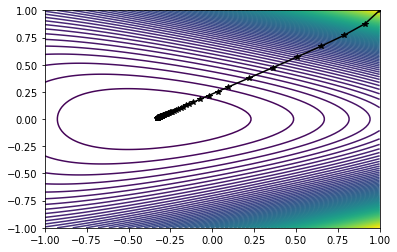

In [141]:
Xopt, Xhist, step_time, fun_evals = newton(boyd_example_func, [1,1], maximum_iterations = 1000, eps = 1e-3, linesearch = backtracking_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = boyd_example_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### Boyd + exact line search

Iteration: 1, point: [1, 1]
Iteration: 2, point: [ 0.25549064 -0.05558229]
Iteration: 3, point: [-0.35767615 -0.02606454]
Iteration: 4, point: [-3.45106344e-01  1.52264184e-04]


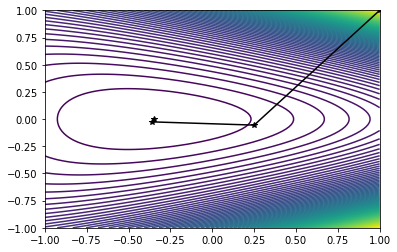

In [119]:
Xopt, Xhist, step_time, fun_evals = newton(boyd_example_func, [1,1], maximum_iterations = 1000, eps = 1e-3, linesearch = exact_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = boyd_example_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### Quadratic + backtracking line search

Iteration: 1, point: [0, 0]
Iteration: 2, point: [-0.03571429 -0.10714286]
Iteration: 3, point: [-0.0625 -0.1875]
Iteration: 4, point: [-0.07254464 -0.21763393]
Iteration: 5, point: [-0.08133371 -0.24400112]
Iteration: 6, point: [-0.08902414 -0.26707241]
Iteration: 7, point: [-0.09575326 -0.28725978]
Iteration: 8, point: [-0.09869725 -0.29609176]
Iteration: 9, point: [-0.10145725 -0.30437174]
Iteration: 10, point: [-0.10404474 -0.31213422]
Iteration: 11, point: [-0.10647052 -0.31941155]
Iteration: 12, point: [-0.10874468 -0.32623404]
Iteration: 13, point: [-0.11087671 -0.33263013]
Iteration: 14, point: [-0.11287549 -0.33862646]
Iteration: 15, point: [-0.11474934 -0.34424802]
Iteration: 16, point: [-0.11650608 -0.34951823]
Iteration: 17, point: [-0.11815302 -0.35445906]
Iteration: 18, point: [-0.11969703 -0.35909108]
Iteration: 19, point: [-0.12042078 -0.36126234]
Iteration: 20, point: [-0.12112192 -0.36336575]
Iteration: 21, point: [-0.12180114 -0.36540343]
Iteration: 22, point: [-0.12

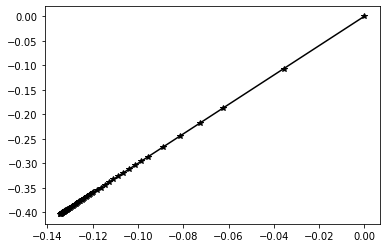

In [156]:
H = np.array([[4, 1],
              [1, 2]])
    
b = np.array([1, 1])

Xopt, Xhist, step_time, fun_evals = newton(quadratic, [0,0], maximum_iterations = 1000, eps = 1e-3, linesearch = backtracking_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### Quadratic + exact line search

Iteration: 1, point: [0, 0]
Iteration: 2, point: [-0.14285714 -0.42857143]


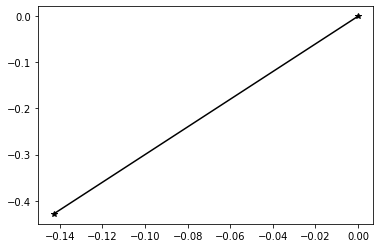

In [154]:
H = np.array([[4, 1],
              [1, 2]])
    
b = np.array([1, 1])

Xopt, Xhist, step_time, fun_evals = newton(quadratic, [0,0], maximum_iterations = 1000, eps = 1e-3, linesearch = exact_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### My function + backtracking line search

Iteration: 1, point: [0, 1.5]
Iteration: 2, point: [-0.00334448  0.        ]
Iteration: 3, point: [ 0.99776042 -0.00668517]
Iteration: 4, point: [0.99776598 0.49443143]
Iteration: 5, point: [0.99777149 0.61971882]
Iteration: 6, point: [0.99777515 0.66670476]
Iteration: 7, point: [0.99777932 0.70781938]
Iteration: 8, point: [0.99778406 0.74379687]
Iteration: 9, point: [0.99778945 0.77527965]
Iteration: 10, point: [0.99779252 0.78905478]
Iteration: 11, point: [0.99779578 0.80196973]
Iteration: 12, point: [0.99779925 0.81407832]
Iteration: 13, point: [0.99780293 0.82543099]
Iteration: 14, point: [0.99780685 0.83607504]
Iteration: 15, point: [0.99781102 0.84605482]
Iteration: 16, point: [0.99781544 0.8554119 ]
Iteration: 17, point: [0.99782014 0.86418527]
Iteration: 18, point: [0.99782514 0.87241147]
Iteration: 19, point: [0.99783044 0.88012476]
Iteration: 20, point: [0.99783325 0.88374103]
Iteration: 21, point: [0.99783614 0.88724462]
Iteration: 22, point: [0.99783912 0.89063908]
Iteratio

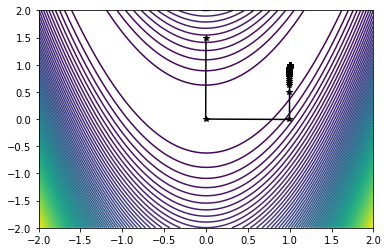

In [160]:
Xopt, Xhist, step_time, fun_evals = newton(my_func, [0,1.5], maximum_iterations = 1000, eps = 1e-3, linesearch = backtracking_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = my_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### My function + exact line search

Iteration: 1, point: [0, 1.5]
Iteration: 2, point: [-0.00334448  0.        ]
Iteration: 3, point: [ 0.16684335 -0.00113648]
Iteration: 4, point: [0.39736849 0.13025628]
Iteration: 5, point: [0.6539611  0.41103423]
Iteration: 6, point: [0.83313247 0.68262963]
Iteration: 7, point: [0.99311391 0.98547814]


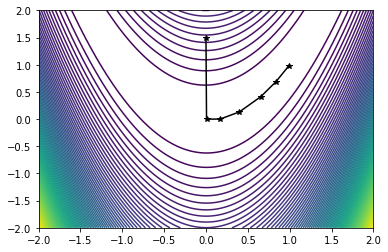

In [161]:
Xopt, Xhist, step_time, fun_evals = newton(my_func, [0,1.5], maximum_iterations = 1000, eps = 1e-3, linesearch = exact_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = my_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

---

### **Problem 5.2 (5 pts)**
Complete the implementation of Conjugate gradients method (see [Nocedal, Wright, *Numerical Optimization*, $\S 5.2$])

<img src="Nocedal_Wright-CG_FR.png">

In [391]:

###############################################################################
def cg_fr(func, initial_x, eps=1e-2, maximum_iterations=65536, linesearch=bisection, s = 1):
    """ 
    Conjugate Gradient
    func:               the function to optimize It is called as "value, gradient = func( x, 1 )
    initial_x:          the starting point
    eps:                the maximum allowed error in the resulting stepsize t
    maximum_iterations: the maximum allowed number of iterations
    linesearch:         the linesearch routine
    *linesearch_args:   the extra arguments of linesearch routine
    """
    
    if eps <= 0:
        raise ValueError("Epsilon must be positive")
    x = initial_x
    
    # initialization
    values = []
    runtimes = []
    xs = []
    start_time = time.time()
    m = len(x)
    iterations = 0
    value, gradient = func(x, 1)
    gradient_old = gradient
    p = -gradient
    z = np.zeros(m)
    
    # conjugate gradient updates
    while True:
        print(f"Iteration: {iterations}, point: {x}")
        
        values.append(x)
        t = linesearch(func, x, p)
        x = x + t*p*s
        
        value, gradient = func(x, 1)
        
        # updating the logs
        runtimes.append(time.time() - start_time)
        xs.append(x.copy())
        
        # gradient equal to 0
        if gradient @ gradient < eps**2:
            break
        
        beta = (gradient.T @ gradient)/(gradient_old.T @ gradient_old)
        #print(beta)
        # reset after #(dimensions) iterations
        if iterations % m == 0:
            beta = 0
        
        p = -gradient + beta*p
        
        gradient_old = gradient

        iterations += 1
        if iterations >= maximum_iterations:
            print("Too many iterations")
            break
    
    return (x, values, runtimes, iterations)

Copy the function above but implement the Polak-Riberie formulae in line 47.
$$ \beta_{k+1}^{\mathtt{PR}} = \frac{\nabla f_{k+1}^T(\nabla f_{k+1} - \nabla f_k)}{\|f_k\|^2}$$

Observe that we applied the reset trick in lines 44-45.
It is worth reading more implementation hints in section [Nocedal, Wright, *Numerical Optimization*, $\S 5.2$].

In [392]:
###############################################################################
def cg_pr(func, initial_x, eps=1e-2, maximum_iterations=65536, linesearch=bisection, s=1):
    """ 
    Conjugate Gradient
    func:               the function to optimize It is called as "value, gradient = func( x, 1 )
    initial_x:          the starting point
    eps:                the maximum allowed error in the resulting stepsize t
    maximum_iterations: the maximum allowed number of iterations
    linesearch:         the linesearch routine
    *linesearch_args:   the extra arguments of linesearch routine
    """
    
    if eps <= 0:
        raise ValueError("Epsilon must be positive")
    x = initial_x
    
    # initialization
    values = []
    runtimes = []
    xs = []
    start_time = time.time()
    m = len(x)
    iterations = 0
    value_old, gradient_old = func(x, 1)
    p = -gradient_old
    z = np.zeros(m)
    
    # conjugate gradient updates
    while True:
        print(f"Iteration: {iterations}, point: {x}")
        values.append(x)
        t = linesearch(func, x, p)
        x = x + t*p*s
        
        value, gradient = func(x, 1)
        
        # updating the logs
        runtimes.append(time.time() - start_time)
        xs.append(x.copy())
        
        # gradient equal to 0
        if (gradient @ gradient) < eps**2:
            break
        
        beta = (gradient.T @ (gradient - gradient_old))/(gradient_old.T @ gradient_old)
        #print(beta)
        # reset after #(dimensions) iterations
        if iterations % m == 0:
            beta = 0
        
        p = -gradient + beta*p
        
        gradient_old = gradient
        value_old = value

        iterations += 1
        if iterations >= maximum_iterations:
            print("Too many iterations")
            break
    
    return (x, values, runtimes, iterations)

Test your implementation and compare the efficiency on some test functions
* the same as in previous problem

In [425]:
# change -> alpha = 0.001
def exact_line_search(func, x, direction, alpha = 1e-3):
    t = 1
    direction = direction*alpha
    x += direction
    x_step = x + direction
    while func(x_step) < func(x):
        x = x_step
        x_step = x + direction
        t += 1
    return alpha*t

### CG-FR: Boyd + backtracking line search

Iteration: 0, point: [1, 1]
Iteration: 1, point: [0.75403983 0.26080011]
Iteration: 2, point: [0.73074212 0.21090769]
Iteration: 3, point: [0.71330231 0.17646308]
Iteration: 4, point: [0.70385397 0.16110562]
Iteration: 5, point: [0.68680214 0.13442325]
Iteration: 6, point: [0.67820818 0.12324844]
Iteration: 7, point: [0.66236294 0.1034297 ]
Iteration: 8, point: [0.65432949 0.09513051]
Iteration: 9, point: [0.63926521 0.08016005]
Iteration: 10, point: [0.63163603 0.07391483]
Iteration: 11, point: [0.62438349 0.06820079]
Iteration: 12, point: [0.62067702 0.06559022]
Iteration: 13, point: [0.61342391 0.06057469]
Iteration: 14, point: [0.60978969 0.05828467]
Iteration: 15, point: [0.60266081 0.0538737 ]
Iteration: 16, point: [0.59909301 0.05186113]
Iteration: 17, point: [0.59207972 0.04797578]
Iteration: 18, point: [0.58857367 0.046204  ]
Iteration: 19, point: [0.58166931 0.04277673]
Iteration: 20, point: [0.57822122 0.04121442]
Iteration: 21, point: [0.57142053 0.03818717]
Iteration: 22, 

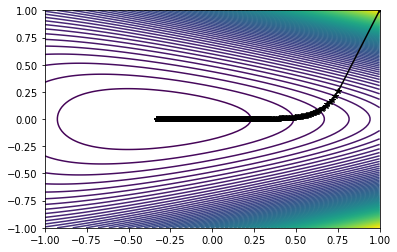

In [426]:
Xopt, Xhist, step_time, fun_evals = cg_fr(boyd_example_func, [1,1], maximum_iterations = 10000, eps = 1e-3, linesearch = backtracking_line_search, s=0.01)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = boyd_example_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-FR: Boyd + exact line search

Iteration: 0, point: [1, 1]
Iteration: 1, point: [ 0.65565576 -0.03487985]
Iteration: 2, point: [0.00300864 0.20083993]
Iteration: 3, point: [-0.41660755  0.03755504]
Iteration: 4, point: [-0.39822474 -0.0056847 ]
Iteration: 5, point: [-3.46563236e-01  3.06456319e-04]


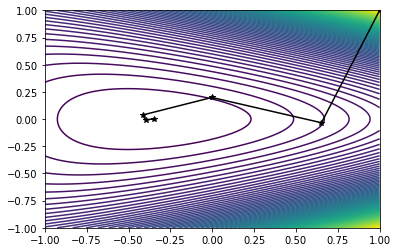

In [427]:
Xopt, Xhist, step_time, fun_evals = cg_fr(boyd_example_func, [1,1], maximum_iterations = 1000, eps = 1e-3, linesearch = exact_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = boyd_example_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-PR: Boyd + backtracking line search

Iteration: 0, point: [1, 1]
Iteration: 1, point: [0.75403983 0.26080011]
Iteration: 2, point: [0.73074212 0.21090769]
Iteration: 3, point: [0.72243929 0.19603005]
Iteration: 4, point: [0.71256217 0.17862769]
Iteration: 5, point: [0.7038933  0.16449283]
Iteration: 6, point: [0.69472971 0.15039629]
Iteration: 7, point: [0.68652155 0.13872953]
Iteration: 8, point: [0.67788172 0.12717984]
Iteration: 9, point: [0.67001694 0.1174719 ]
Iteration: 10, point: [0.66177822 0.10792957]
Iteration: 11, point: [0.65417815 0.09980123]
Iteration: 12, point: [0.64625861 0.0918672 ]
Iteration: 13, point: [0.63887028 0.08502885]
Iteration: 14, point: [0.63121371 0.07839895]
Iteration: 15, point: [0.62400164 0.07262466]
Iteration: 16, point: [0.62028512 0.06984323]
Iteration: 17, point: [0.61666512 0.06723271]
Iteration: 18, point: [0.61299898 0.06467949]
Iteration: 19, point: [0.60942149 0.06227829]
Iteration: 20, point: [0.60580275 0.05993254]
Iteration: 21, point: [0.60226557 0.05772229]
Iteration: 22, 

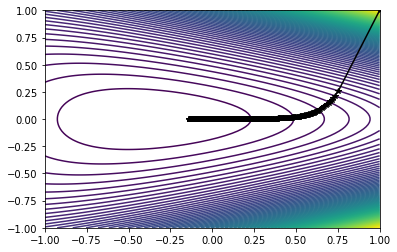

In [326]:
Xopt, Xhist, step_time, fun_evals = cg_pr(boyd_example_func, [1,1], maximum_iterations = 1000, eps = 1e-3, linesearch = backtracking_line_search, s =0.01)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = boyd_example_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-PR: Boyd + exact line search

Iteration: 0, point: [1, 1]
Iteration: 1, point: [ 0.65565576 -0.03487985]
Iteration: 2, point: [0.00300864 0.20083993]
Iteration: 3, point: [-0.41699238  0.03769403]
Iteration: 4, point: [-0.39850963 -0.00568972]
Iteration: 5, point: [-0.34585538 -0.00139821]
Iteration: 6, point: [-3.46019974e-01  3.59699491e-05]


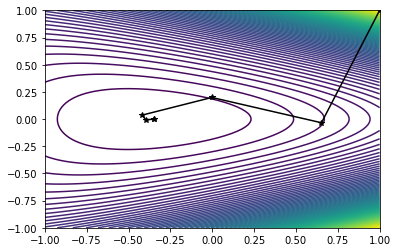

In [428]:
Xopt, Xhist, step_time, fun_evals = cg_pr(boyd_example_func, [1,1], maximum_iterations = 1000, eps = 1e-3, linesearch = exact_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = boyd_example_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-FR: Quadratic + backtracking line search

Iteration: 0, point: [0, 0]
Iteration: 1, point: [-0.25 -0.25]
Iteration: 2, point: [-0.21875 -0.28125]
Iteration: 3, point: [-0.18115234 -0.32666016]
Iteration: 4, point: [-0.177948   -0.33700562]
Iteration: 5, point: [-0.17230533 -0.35462927]
Iteration: 6, point: [-0.170935  -0.3583304]
Iteration: 7, point: [-0.16838274 -0.36518556]
Iteration: 8, point: [-0.16717284 -0.36834951]
Iteration: 9, point: [-0.16492252 -0.37421126]
Iteration: 10, point: [-0.1638631  -0.37691922]
Iteration: 11, point: [-0.16189454 -0.38193711]
Iteration: 12, point: [-0.16097218 -0.38425683]
Iteration: 13, point: [-0.15925946 -0.38855584]
Iteration: 14, point: [-0.15845966 -0.39054424]
Iteration: 15, point: [-0.15697521 -0.39422954]
Iteration: 16, point: [-0.15662942 -0.39508213]
Iteration: 17, point: [-0.15596307 -0.39672433]
Iteration: 18, point: [-0.15564156 -0.39751478]
Iteration: 19, point: [-0.15502202 -0.39903729]
Iteration: 20, point: [-0.15472318 -0.39977016]
Iteration: 21, point: [-0.15414737 -0.401

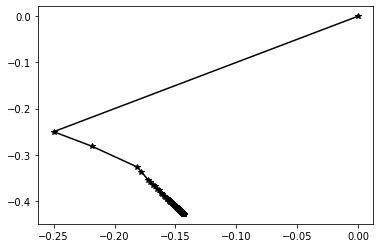

In [334]:
H = np.array([[4, 1],
              [1, 2]])
    
b = np.array([1, 1])

Xopt, Xhist, step_time, fun_evals = cg_fr(quadratic, [0,0], maximum_iterations = 10000, eps = 1e-3, linesearch = backtracking_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-FR: Quadratic + exact line search

Iteration: 0, point: [0, 0]
Iteration: 1, point: [-0.25 -0.25]
Iteration: 2, point: [-0.12475 -0.37525]


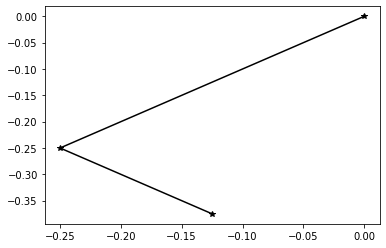

In [429]:
Xopt, Xhist, step_time, fun_evals = cg_fr(quadratic, [0,0], maximum_iterations = 10000, eps = 1e-3, linesearch = exact_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-PR: Quadratic + backtracking line search

Iteration: 0, point: [0, 0]
Iteration: 1, point: [-0.25 -0.25]
Iteration: 2, point: [-0.21875 -0.28125]
Iteration: 3, point: [-0.20458984 -0.30322266]
Iteration: 4, point: [-0.19699097 -0.31503296]
Iteration: 5, point: [-0.19125878 -0.324746  ]
Iteration: 6, point: [-0.18564746 -0.33469908]
Iteration: 7, point: [-0.18132691 -0.3428541 ]
Iteration: 8, point: [-0.1770668 -0.3511644]
Iteration: 9, point: [-0.17373579 -0.35795415]
Iteration: 10, point: [-0.17208275 -0.36140277]
Iteration: 11, point: [-0.17060677 -0.36452436]
Iteration: 12, point: [-0.16913954 -0.36766012]
Iteration: 13, point: [-0.16782704 -0.3704976 ]
Iteration: 14, point: [-0.16652061 -0.37334691]
Iteration: 15, point: [-0.16535011 -0.37592447]
Iteration: 16, point: [-0.1641837 -0.378512 ]
Iteration: 17, point: [-0.16313726 -0.38085221]
Iteration: 18, point: [-0.16209347 -0.38320091]
Iteration: 19, point: [-0.16115597 -0.3853247 ]
Iteration: 20, point: [-0.16022007 -0.38745578]
Iteration: 21, point: [-0.15937868 -0.38938

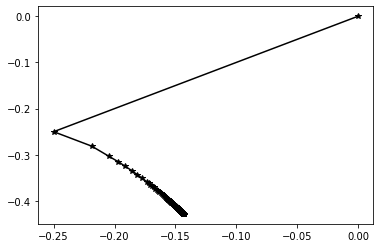

In [336]:
Xopt, Xhist, step_time, fun_evals = cg_pr(quadratic, [0,0], maximum_iterations = 10000, eps = 1e-3, linesearch = backtracking_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-PR: Quadratic + exact line search

Iteration: 0, point: [0, 0]
Iteration: 1, point: [-0.25 -0.25]
Iteration: 2, point: [-0.12475 -0.37525]


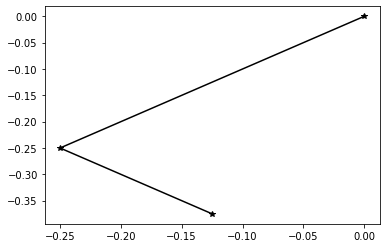

In [430]:
Xopt, Xhist, step_time, fun_evals = cg_pr(quadratic, [0,0], maximum_iterations = 10000, eps = 1e-3, linesearch = exact_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-FR: my function + backtracking line search

Iteration: 0, point: [0, 1.5]
Iteration: 1, point: [ 0.02 -1.5 ]
Iteration: 2, point: [-0.030216  0.0004  ]
Iteration: 3, point: [-0.00955445  0.00156853]
Iteration: 4, point: [-0.00923984  0.00152237]
Iteration: 5, point: [-0.00861113  0.00143136]
Iteration: 6, point: [-0.00829667  0.00138895]
Iteration: 7, point: [-0.0076682   0.00130534]
Iteration: 8, point: [-0.00735391  0.00126638]
Iteration: 9, point: [-0.00672574  0.00118959]
Iteration: 10, point: [-0.00641162  0.00115383]
Iteration: 11, point: [-0.00578378  0.00108334]
Iteration: 12, point: [-0.00546985  0.00105053]
Iteration: 13, point: [-0.00484239  0.00098586]
Iteration: 14, point: [-0.00452866  0.00095578]
Iteration: 15, point: [-0.00390159  0.00089651]
Iteration: 16, point: [-0.00358809  0.00086897]
Iteration: 17, point: [-0.00296144  0.0008147 ]
Iteration: 18, point: [-0.00264816  0.00078952]
Iteration: 19, point: [-0.00202196  0.0007399 ]
Iteration: 20, point: [-0.00170892  0.0007169 ]
Iteration: 21, point: [-0.00139605 

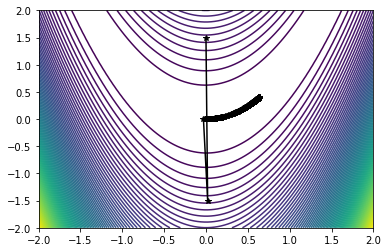

In [348]:
Xopt, Xhist, step_time, fun_evals = cg_fr(my_func, [0,1.5], maximum_iterations = 1000, eps = 1e-3, linesearch = backtracking_line_search, s=0.01)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = my_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-FR: my function + exact line search

In [422]:
# change -> alpha = 0.001
def exact_line_search(func, x, direction, alpha = 1e-3):
    t = 1
    direction = direction*alpha
    x += direction
    x_step = x + direction
    while func(x_step) < func(x):
        x = x_step
        x_step = x + direction
        t += 1
    return alpha*t

Iteration: 0, point: [0, 1.5]
Iteration: 1, point: [0.01 0.  ]
Iteration: 2, point: [0.168368 0.0016  ]
Iteration: 3, point: [0.3116317  0.05655692]
Iteration: 4, point: [0.29323744 0.09711431]
Iteration: 5, point: [0.31255329 0.08844519]
Iteration: 6, point: [0.31408734 0.10138731]
Iteration: 7, point: [0.45621469 0.18888354]
Iteration: 8, point: [0.44651479 0.20428218]
Iteration: 9, point: [0.45920221 0.20364581]
Iteration: 10, point: [0.45797852 0.21086667]
Iteration: 11, point: [0.56083156 0.29818815]
Iteration: 12, point: [0.55246717 0.30799448]
Iteration: 13, point: [0.55917579 0.30740911]
Iteration: 14, point: [0.5579888  0.31162388]
Iteration: 15, point: [0.63752118 0.39226136]
Iteration: 16, point: [0.6288542 0.4007645]
Iteration: 17, point: [0.6355592  0.40004554]
Iteration: 18, point: [0.63451905 0.40315751]
Iteration: 19, point: [0.7896785  0.61392358]
Iteration: 20, point: [0.78441175 0.617791  ]
Iteration: 21, point: [0.78756587 0.61704406]
Iteration: 22, point: [0.785801

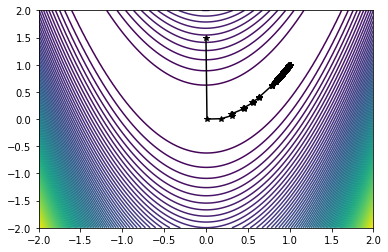

In [423]:
Xopt, Xhist, step_time, fun_evals = cg_fr(my_func, [0,1.5], maximum_iterations = 1000, eps = 1e-3, linesearch = exact_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = my_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-PR: my function + backtracking line search

Iteration: 0, point: [0, 1.5]
Iteration: 1, point: [ 0.02 -1.5 ]
Iteration: 2, point: [-0.030216  0.0004  ]
Iteration: 3, point: [-0.00954327  0.00123456]
Iteration: 4, point: [-0.00922847  0.00119883]
Iteration: 5, point: [-0.00891389  0.00116404]
Iteration: 6, point: [-0.0085992   0.00113015]
Iteration: 7, point: [-0.00828474  0.00109716]
Iteration: 8, point: [-0.00797018  0.00106502]
Iteration: 9, point: [-0.00765584  0.00103374]
Iteration: 10, point: [-0.00734141  0.00100327]
Iteration: 11, point: [-0.00702719  0.00097361]
Iteration: 12, point: [-0.0067129   0.00094473]
Iteration: 13, point: [-0.00639882  0.00091663]
Iteration: 14, point: [-0.00608467  0.00088926]
Iteration: 15, point: [-0.00577073  0.00086264]
Iteration: 16, point: [-0.00545672  0.00083672]
Iteration: 17, point: [-0.00514292  0.00081152]
Iteration: 18, point: [-0.00482907  0.00078698]
Iteration: 19, point: [-0.00451542  0.00076313]
Iteration: 20, point: [-0.00420171  0.00073992]
Iteration: 21, point: [-0.00388821 

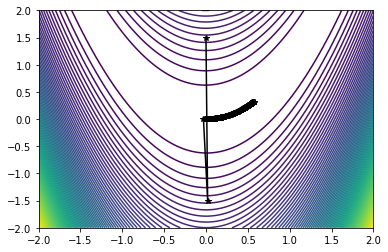

In [359]:
Xopt, Xhist, step_time, fun_evals = cg_pr(my_func, [0,1.5], maximum_iterations = 1000, eps = 1e-3, linesearch = backtracking_line_search, s = 0.01)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = my_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### CG-PR: my function + exact line search

Iteration: 0, point: [0, 1.5]
Iteration: 1, point: [0.01 0.  ]
Iteration: 2, point: [0.168368 0.0016  ]
Iteration: 3, point: [0.29806195 0.05106887]
Iteration: 4, point: [0.28256451 0.08884092]
Iteration: 5, point: [0.28463775 0.0921406 ]
Iteration: 6, point: [0.29812282 0.08101865]
Iteration: 7, point: [0.3633731  0.10937874]
Iteration: 8, point: [0.35529092 0.12750775]
Iteration: 9, point: [0.64953016 0.41109784]
Iteration: 10, point: [0.64322162 0.4175728 ]
Iteration: 11, point: [0.64258616 0.42018172]
Iteration: 12, point: [0.65033252 0.41582287]
Iteration: 13, point: [0.65296227 0.41589263]
Iteration: 14, point: [0.64684295 0.42217289]
Iteration: 15, point: [0.64619398 0.42478251]
Iteration: 16, point: [0.65391222 0.420453  ]
Iteration: 17, point: [0.65659704 0.42048517]
Iteration: 18, point: [0.65027836 0.42686588]
Iteration: 19, point: [0.64950914 0.42955707]
Iteration: 20, point: [0.65760961 0.4249401 ]
Iteration: 21, point: [0.66046185 0.42484718]
Iteration: 22, point: [0.6534

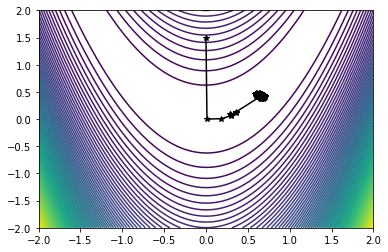

In [424]:
Xopt, Xhist, step_time, fun_evals = cg_pr(my_func, [0,1.5], maximum_iterations = 1000, eps = 1e-3, linesearch = exact_line_search)
Xhist_ = np.array([[x[0], x[1]] for x in Xhist])

MX,MY = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = my_func(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

### **Problem 5.3** (3 pts)
Compare the efficiency (number of function/gradient evaluations) of FR and PR updates in CG method for Powell's optimization problem (PSF):
$$ \min_{-10 \leq x_i \leq 10} (x_1+10x_2)^2+5(x_3-x_4)^2+(x_2-2x_3)^4 + 10(x_1-x_4)^4,$$


Observe that $f(X^*)=0$ for $X^*=0$.

More info about PSF can be found, for example, here http://www.optimization-online.org/DB_FILE/2012/03/3382.pdf.

Compare your results with [Nocedal, Wright, *Numerical Optimization*, Table 5.1] (row XPOWELL)
<img width=50% src="Table51.png">

In [413]:
def psf(x, order = 0):
    value = (x[0] + 10*x[1])**2 + 5*(x[2] - x[3])**2 + (x[1] - 2*x[2])**4 + 10*(x[0] - x[3])**4
    if order == 0:
        return value
    elif order == 1:
        gradient = np.array([2*(20*((x[0] - x[3])**3) + x[0] + 10*x[1]), 
                         4*(5*(x[0]+10*x[1])+(x[1]-2*x[2])**3),
                         10*(x[2]-x[3])-8*(x[1]-2*x[2])**3,
                         10*(-4*(x[0]-x[3])**3+x[3]-x[2])])
        return (value, gradient)

# change -> alpha = 0.001
def exact_line_search(func, x, direction, alpha = 1e-3):
    t = 1
    direction = direction*alpha
    x += direction
    x_step = x + direction
    while func(x_step) < func(x):
        x = x_step
        x_step = x + direction
        t += 1
    return alpha*t

### CG-FR + Backtracking line search

In [414]:
Xopt, Xhist, step_time, fun_evals = cg_fr(psf, [3, -1, 0, 1], maximum_iterations = 1000, eps = 1e-3, linesearch = backtracking_line_search, s = 0.012)

Iteration: 0, point: [3, -1, 0, 1]
Iteration: 1, point: [ 1.164 -0.136  0.012  2.86 ]
Iteration: 2, point: [ 2.33716837 -0.1123817   0.18268339  1.51830363]
Iteration: 3, point: [ 2.3051699  -0.14803565  0.20207646  1.52596889]
Iteration: 4, point: [ 2.25484094 -0.19346274  0.23171373  1.53915998]
Iteration: 5, point: [ 2.2320405  -0.20763576  0.24648665  1.543319  ]
Iteration: 6, point: [ 2.22200638 -0.20893932  0.25414951  1.54339334]
Iteration: 7, point: [ 2.20320713 -0.21102004  0.26864997  1.54316772]
Iteration: 8, point: [ 2.1782768  -0.2129471   0.28816268  1.54204127]
Iteration: 9, point: [ 2.1212352  -0.21466462  0.3335073   1.53681327]
Iteration: 10, point: [ 2.10933491 -0.20979     0.34333232  1.5307402 ]
Iteration: 11, point: [ 2.08676486 -0.20133996  0.36150908  1.51898123]
Iteration: 12, point: [ 2.05622296 -0.1915616   0.38496838  1.50252584]
Iteration: 13, point: [ 2.03828951 -0.18696041  0.39771785  1.49243196]
Iteration: 14, point: [ 2.03315716 -0.18664635  0.40023953

In [415]:
print(f" Point: {Xopt} \n  Value: {psf(Xopt)} \n  Gradient: {psf(Xopt,order=1)[1]}, \n Number of iterations {fun_evals}")

 Point: [ 0.68507375 -0.06467363  0.26552562  0.411792  ] 
  Value: 0.29015998842209234 
  Gradient: [ 0.89305408 -0.07891371  0.2286617   0.64628459], 
 Number of iterations 1000


### CG-FR + Exact line search

In [418]:
Xopt, Xhist, step_time, fun_evals = cg_fr(psf, [3, -1, 0, 1], maximum_iterations = 1000, eps = 1e-3, linesearch = exact_line_search)

Iteration: 0, point: [3, -1, 0, 1]
Iteration: 1, point: [ 1.776 -0.424  0.008  2.24 ]
Iteration: 2, point: [ 1.84739115 -0.02703411  0.18110822  2.02947285]
Iteration: 3, point: [ 1.86493985 -0.17120904  0.6248494   1.54069507]
Iteration: 4, point: [ 1.84456643 -0.07797261  0.50753202  1.34810885]
Iteration: 5, point: [ 1.74283729 -0.19104349  0.38261529  1.14112362]
Iteration: 6, point: [ 1.64228873 -0.1088453   0.38968674  1.15467353]
Iteration: 7, point: [ 1.33782084 -0.14529387  0.44717635  1.11240026]
Iteration: 8, point: [ 1.12699667 -0.04086633  0.44175384  0.96604307]
Iteration: 9, point: [ 0.5678953  -0.08796758  0.39943804  0.47090679]
Iteration: 10, point: [ 0.57141771 -0.03381404  0.3702464   0.46683763]
Iteration: 11, point: [ 0.56174394 -0.06598366  0.28956234  0.44323724]
Iteration: 12, point: [ 0.55987989 -0.04353062  0.25540248  0.41903939]
Iteration: 13, point: [ 0.54698912 -0.06681672  0.21890267  0.3433486 ]
Iteration: 14, point: [ 0.54641649 -0.04919138  0.22020149

In [419]:
print(f" Point: {Xopt} \n  Value: {psf(Xopt)} \n  Gradient: {psf(Xopt,order=1)[1]}, \n Number of iterations {fun_evals}")

 Point: [ 0.0398903  -0.0039902   0.01985318  0.01989792] 
  Value: 5.253473619856613e-06 
  Gradient: [ 0.00029622 -0.00056789  0.00022008  0.00012776], 
 Number of iterations 112


### CG-PR + backtracking line search

In [409]:
Xopt, Xhist, step_time, fun_evals = cg_pr(psf, [3, -1, 0, 1], maximum_iterations = 1000, eps = 1e-3, linesearch = backtracking_line_search, s = 0.01)

Iteration: 0, point: [3, -1, 0, 1]
Iteration: 1, point: [ 1.47 -0.28  0.01  2.55]
Iteration: 2, point: [ 1.6026212 -0.21323    0.07296    2.3605288]
Iteration: 3, point: [ 1.61799934 -0.20179265  0.11459786  2.30381539]
Iteration: 4, point: [ 1.65045086 -0.18233821  0.16283984  2.22348488]
Iteration: 5, point: [ 1.65789291 -0.1787973   0.18372111  2.19425595]
Iteration: 6, point: [ 1.6659333  -0.17473037  0.20722294  2.16140908]
Iteration: 7, point: [ 1.67169977 -0.17193594  0.22808853  2.13301943]
Iteration: 8, point: [ 1.67640997 -0.1696594   0.24827233  2.10586336]
Iteration: 9, point: [ 1.68017447 -0.16779538  0.26748056  2.08010251]
Iteration: 10, point: [ 1.68336719 -0.16611556  0.28666765  2.05424646]
Iteration: 11, point: [ 1.68570307 -0.16473307  0.30376159  2.03089138]
Iteration: 12, point: [ 1.68755704 -0.16345271  0.31996467  2.00831205]
Iteration: 13, point: [ 1.68899193 -0.16224287  0.33516225  1.98656318]
Iteration: 14, point: [ 1.690143   -0.1610214   0.35003366  1.9646

In [410]:
print(f" Point: {Xopt} \n  Value: {psf(Xopt)} \n  Gradient: {psf(Xopt,order=1)[1]}, \n Number of iterations {fun_evals}")

 Point: [ 1.03265631 -0.09479501  0.34011904  0.67687109] 
  Value: 1.0952297326488325 
  Gradient: [ 1.97086849 -0.16805188  0.35683162  1.56606442], 
 Number of iterations 1000


### CG-PR + exact line search

In [420]:
Xopt, Xhist, step_time, fun_evals = cg_pr(psf, [3, -1, 0, 1], maximum_iterations = 1000, eps = 1e-3, linesearch = exact_line_search)

Iteration: 0, point: [3, -1, 0, 1]
Iteration: 1, point: [ 1.776 -0.424  0.008  2.24 ]
Iteration: 2, point: [ 1.84739115 -0.02703411  0.18110822  2.02947285]
Iteration: 3, point: [ 1.88903614 -0.02211359  0.6582034   1.49695116]
Iteration: 4, point: [ 1.8496494  -0.18837227  0.59225439  1.44436203]
Iteration: 5, point: [ 1.76664068 -0.20899699  0.33573673  1.2976227 ]
Iteration: 6, point: [ 1.73183784 -0.11702853  0.37732009  1.24270353]
Iteration: 7, point: [ 1.53978164 -0.08790307  0.53520325  1.04336229]
Iteration: 8, point: [ 1.39445702 -0.16909979  0.4926887   0.97393576]
Iteration: 9, point: [ 0.86963824 -0.11350754  0.1623409   0.70500709]
Iteration: 10, point: [ 0.87386694 -0.04576407  0.21938372  0.64202894]
Iteration: 11, point: [ 0.86204042 -0.06035698  0.33635327  0.51202397]
Iteration: 12, point: [ 0.84475271 -0.08840332  0.31955995  0.51795537]
Iteration: 13, point: [ 0.77494442 -0.0856104   0.25651076  0.51486796]
Iteration: 14, point: [ 0.77007235 -0.06327875  0.26431705

In [421]:
print(f" Point: {Xopt} \n  Value: {psf(Xopt)} \n  Gradient: {psf(Xopt,order=1)[1]}, \n Number of iterations {fun_evals}")

 Point: [ 0.04574394 -0.00457539  0.0227545   0.02283682] 
  Value: 9.079763274698261e-06 
  Gradient: [ 0.00046087 -0.00070195  0.00018194  0.00034233], 
 Number of iterations 219


Number of iterations (using exact line search) is similar to number in the table. For F-R formula it works almost the same.

### **Problem 5.4 (2 pts)**
Show experimentally that affine invariance of Newton's method. 

Let $f:\mathbb{R}^n\to\mathbb{R}$ be a convex function.
Consider an affine transform $y\mapsto Ay + b$, where $A \in \mathbb{R}^{n\times n}$ is invertible and
$b \in \mathbb R^n$.

Define the function $g : \mathbb R^n \mapsto \mathbb{R}$ by $g(y) = f(Ay + b)$.
Denote by $x^{(k)}$ the k-th iterate of Newton’s method performed on $f$.
Denote by $y^{(k)}$ the k-th iterate of Newton’s method performed on $g$.
* Show that if $x^{(k)} = Ay^{(k)} + b$, then $x^{(k+1)} = Ay^{(k+1)} + b$.
* Show that Newton's decrement does not depend on the coordinates, i.e., show that $λ(x^{(k)}) = λ(y^{(k)} ).$

Together, this implies that Newton’s method is affine invariant. As an important consequence,
Newton’s method cannot be improved by a change of coordinates, unlike gradient descent.

In [705]:
# convex function - semi-positive definite matrix
H = np.array([[7, 2],
              [2, 1]])
    
b = np.array([1, 1])

def quadratic(x, order=0):
    """ 
    Quadratic Objective
    H:          the Hessian matrix
    b:          the vector of linear coefficients
    x:          the current iterate
    order:      the order of the oracle. For example, order=1 returns the value of the function and its gradient while order=2 will also return the hessian
    """
    x = np.array(x)
    value = 0.5 * x.T @ H @ x + b.T @ x

    if order == 0:
        return value
    elif order == 1:
        gradient = H @ x + b
        return (value, gradient)
    elif order == 2:
        gradient = H @ x + b
        hessian = H
        return (value, gradient, hessian)
    else:
        raise ValueError("The argument \"order\" should be 0, 1 or 2")

A = np.array([[2, 0], [0, 2]])
b2 = np.array([2,2])
def quadratic_affine(x, order=0):
    x = np.array(x)
    x1 = A @ x + b2
    value = 0.5 * x1.T @ H @ x1 + b.T @ x1

    if order == 0:
        return value
    elif order == 1:
        gradient = H @ x1 + b
        return (value, gradient)
    elif order == 2:
        gradient = H @ x1 + b
        hessian = H
        return (value, gradient, hessian)
    else:
        raise ValueError("The argument \"order\" should be 0, 1 or 2")

# convex function - semi-positive definite matrix

Iteration: 1, point: [0 2]
Iteration: 2, point: [ 0.33333333 -1.66666667]


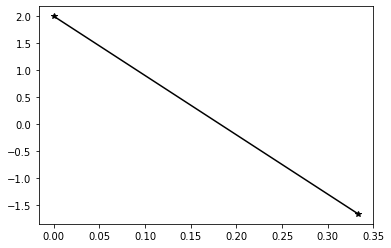

In [706]:
# function f
Xopt_f, Xhist_f, step_time_f, fun_evals_f = newton(quadratic, A@np.array([-1,0]) + b2, maximum_iterations = 140, eps = 1e-3, linesearch = backtracking_line_search)
Xhist_f_ = np.array([[x[0], x[1]] for x in Xhist_f])
plt.plot(Xhist_f_[:,0], Xhist_f_[:,1], '*-k')

Iteration: 1, point: [-1, 0]
Iteration: 2, point: [-0.83333333 -1.83333333]


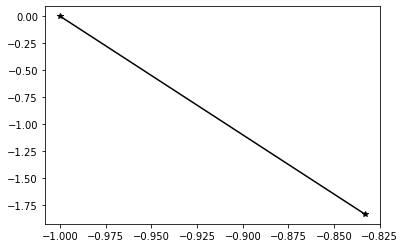

In [707]:
# function g
Xopt_g, Xhist_g, step_time_g, fun_evals_g = newton(quadratic_affine, [-1,0], maximum_iterations = 140, eps = 1e-3, linesearch = backtracking_line_search)
Xhist_g_ = np.array([[x[0], x[1]] for x in Xhist_g])
plt.plot(Xhist_g_[:,0], Xhist_g_[:,1], '*-k')

In [708]:
for i in range(2):
    #print(Xhist_g[i] - (A @ Xhist_f[i] + b2))
    print((A@np.array(Xhist_g[i]) + b2) - np.array(Xhist_f[i]))


[0 0]
[0. 0.]


### **Problem 5.5 (2 pts)**
Show experimentally that conjugate gradient method is *not* affine invariant.


For example consider the quadratic (convex) function $f:\mathbb R^n \to \mathbb R$ as follows
$$ f(x) = \frac12 x^T H x - c^T x,$$
where $H$ positive semi-definite.

Consider an affine transformation $y\mapsto Ay$, where  $A \in \mathbb{R}^{n\times n}$ is invertible:
* Denote by $x^{(0)} , x^{(1)} , x^{(2)}$ the first three iterates of conjugate gradient descent on $f(x)$ initialized at $x^{(0)}$.
* Now, let $y^{(0)}$ be the point such that $x^{(0)} = Ay^{(0)}$. Denote by $y^{(0)} , y^{(1)} , y^{(2)}$ the first three iterates of conjugate gradient descent on $g(y) = f(Ay)$ initialized at $y^{(0)}$.
* Provide an explicit example of $H, A$ and $x^{(0)}$ such that $x^{(1)} \neq Ay^{(1)}$ and $x^{(2)} \neq Ay^{(2)}$.


In [710]:
H = np.array([[7,2], [2,1]])

def quadratic(x, order=0):
    """ 
    Quadratic Objective
    H:          the Hessian matrix
    b:          the vector of linear coefficients
    x:          the current iterate
    order:      the order of the oracle. For example, order=1 returns the value of the function and its gradient while order=2 will also return the hessian
    """
    x = np.array(x)
    value = 0.5 * x.T @ H @ x + b.T @ x

    if order == 0:
        return value
    elif order == 1:
        gradient = H @ x + b
        return (value, gradient)
    elif order == 2:
        gradient = H @ x + b
        hessian = H
        return (value, gradient, hessian)
    else:
        raise ValueError("The argument \"order\" should be 0, 1 or 2")


def quadratic_aff(x, order=0):
    A = np.array([[2, 1], [1, 2]])
    x = np.array(x)
    x1 = A @ x
    value = 0.5 * x1.T @ H @ x1 + b.T @ x1

    if order == 0:
        return value
    elif order == 1:
        gradient = H @ x1 + b
        return (value, gradient)
    elif order == 2:
        gradient = H @ x1 + b
        hessian = H
        return (value, gradient, hessian)
    else:
        raise ValueError("The argument \"order\" should be 0, 1 or 2")



Iteration: 0, point: [-2  0]
Iteration: 1, point: [11  3]
Iteration: 2, point: [-73 -23]
Too many iterations


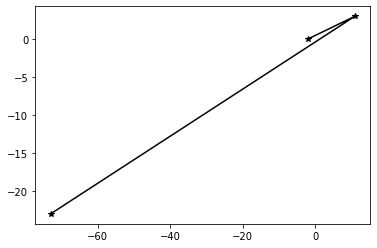

In [711]:
# function f
Xopt_f, Xhist_f, step_time_f, fun_evals_f = cg_pr(quadratic, A@np.array([-1,0]), maximum_iterations = 3, eps = 1e-3, linesearch = backtracking_line_search)
Xhist_f_ = np.array([[x[0], x[1]] for x in Xhist_f])
plt.plot(Xhist_f_[:,0], Xhist_f_[:,1], '*-k')

Iteration: 0, point: [-1, 0]
Iteration: 1, point: [6.5 2. ]
Iteration: 2, point: [-120.5  -39.5]
Too many iterations


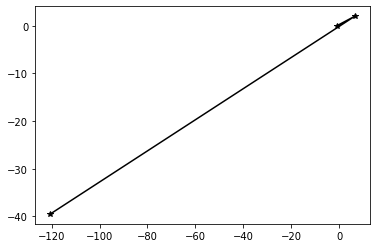

In [712]:
# function g
Xopt_g, Xhist_g, step_time_g, fun_evals_g = cg_pr(quadratic_aff, [-1,0], maximum_iterations = 3, eps = 1e-3, linesearch = backtracking_line_search)
Xhist_g_ = np.array([[x[0], x[1]] for x in Xhist_g])
plt.plot(Xhist_g_[:,0], Xhist_g_[:,1], '*-k')

In [715]:
print(Xhist_f[1] - A@np.array(Xhist_g[1]), Xhist_f[2] - A@np.array(Xhist_g[2]))

[-2. -1.] [168.  56.]
